In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df=pd.read_csv("Housing.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
dummies=pd.get_dummies(df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']],drop_first=True)
dummies

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,0,0,0,1,1,0,0
1,1,0,0,0,1,0,0,0
2,1,0,1,0,0,1,1,0
3,1,0,1,0,1,1,0,0
4,1,1,1,0,1,0,0,0
5,1,0,1,0,1,1,1,0
6,1,0,0,0,1,1,1,0
7,1,0,0,0,0,0,0,1
8,1,1,1,0,1,1,0,0
9,1,1,0,0,1,1,0,1


In [9]:
df2=pd.concat([df,dummies],axis=1)
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,1,0,1,0,0,0


In [10]:
df2=df2.drop(columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],axis=1)
df2

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
5,10850000,7500,3,3,1,2,1,0,1,0,1,1,1,0
6,10150000,8580,4,3,4,2,1,0,0,0,1,1,1,0
7,10150000,16200,5,3,2,0,1,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,0,0
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,1


In [11]:
cor1=df.corr()
cor1

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [12]:
correlated_features=set()
for i in range(len(cor1.columns)):
    for j in range(i):
        if abs(cor1.iloc[i,j])>0.42:
            colname1=cor1.columns[i]
            colname2=cor1.columns[j]
            print(abs(cor1.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)
        

0.5359973457780797 -- 1 -- 0 -- area -- price
0.517545339455012 -- 3 -- 0 -- bathrooms -- price
0.42071236618861724 -- 4 -- 0 -- stories -- price


In [13]:
print(correlated_features)

{'price', 'stories', 'bathrooms', 'area'}


In [26]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df2,test_size=0.3,random_state=9)

In [27]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
426,3353000,2700,3,1,1,0,0,0,0,0,0,0,0,0
294,4200000,4000,4,2,2,0,0,0,0,0,0,0,1,0
99,6265000,6000,4,1,3,0,1,1,1,0,0,1,0,1
189,5040000,3540,2,1,1,0,0,1,1,0,0,0,1,0
424,3360000,3100,3,1,2,0,0,0,1,0,0,0,1,0


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['price','area','bathrooms','stories']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train[num_vars]

,price,area,bathrooms,stories
426,0.138788,0.072165,0.000000,0.000000
294,0.212121,0.161512,0.333333,0.333333
99,0.390909,0.298969,0.000000,0.666667
189,0.284848,0.129897,0.000000,0.000000
424,0.139394,0.099656,0.000000,0.333333
42,0.515152,0.331959,0.333333,1.000000
532,0.033333,0.092784,0.000000,0.000000
200,0.272727,0.197251,0.000000,0.333333
13,0.648485,0.127148,0.333333,0.333333
276,0.221212,0.189003,0.000000,0.000000


In [29]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
426,0.138788,0.072165,3,0.000000,0.000000,0,0,0,0,0,0,0,0,0
294,0.212121,0.161512,4,0.333333,0.333333,0,0,0,0,0,0,0,1,0
99,0.390909,0.298969,4,0.000000,0.666667,0,1,1,1,0,0,1,0,1
189,0.284848,0.129897,2,0.000000,0.000000,0,0,1,1,0,0,0,1,0
424,0.139394,0.099656,3,0.000000,0.333333,0,0,0,1,0,0,0,1,0


In [30]:
y_train=df_train.pop('price')
X_train=df_train

In [31]:
y_train.head()

426    0.138788
294    0.212121
99     0.390909
189    0.284848
424    0.139394
Name: price, dtype: float64

In [32]:
from sklearn import preprocessing
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
def build_model(X,Y):
    X=sm.add_constant(X)
    lm=sm.OLS(Y,X).fit()
    print(lm.summary())
    return lm
    
    

In [34]:
model1=build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     74.73
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           1.43e-94
Time:                        17:12:56   Log-Likelihood:                 397.20
No. Observations:                 381   AIC:                            -766.4
Df Residuals:                     367   BIC:                            -711.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [35]:
def CheckVIf(X):
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return(vif)


In [36]:
CV=CheckVIf(X_train)
CV

,Features,VIF
1,bedrooms,10.69
5,mainroad_yes,6.45
0,area,4.66
3,stories,2.70
11,furnishingstatus_semi-furnished,2.50
12,furnishingstatus_unfurnished,2.16
7,basement_yes,1.99
4,parking,1.94
9,airconditioning_yes,1.74
2,bathrooms,1.66


In [49]:
X_train1=X_train.drop(['bedrooms'],axis=1)

In [50]:
X_train1.head()

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
426,0.072165,0.000000,0.000000,0,0,0,0,0,0,0,0,0
294,0.161512,0.333333,0.333333,0,0,0,0,0,0,0,1,0
99,0.298969,0.000000,0.666667,0,1,1,1,0,0,1,0,1
189,0.129897,0.000000,0.000000,0,0,1,1,0,0,0,1,0
424,0.099656,0.000000,0.333333,0,0,0,1,0,0,0,1,0


In [51]:
model2=build_model(X_train1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     79.17
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           4.18e-94
Time:                        17:18:43   Log-Likelihood:                 393.76
No. Observations:                 381   AIC:                            -761.5
Df Residuals:                     368   BIC:                            -710.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [52]:
CV1=CheckVIf(X_train1)
CV1

,Features,VIF
4,mainroad_yes,5.49
0,area,4.37
2,stories,2.27
10,furnishingstatus_semi-furnished,2.09
3,parking,1.91
6,basement_yes,1.86
11,furnishingstatus_unfurnished,1.75
8,airconditioning_yes,1.73
1,bathrooms,1.65
9,prefarea_yes,1.57


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lm=LinearRegression()
lm.fit(X_train1,y_train)
rfe=RFE(lm)
rfe=rfe.fit(X_train1,y_train)

In [55]:
X_train1.columns[rfe.support_]

Index(['area', 'bathrooms', 'stories', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes'],
      dtype='object')

In [56]:
X_train_rfe=X_train[X_train1.columns[rfe.support_]]

In [57]:
X_train_rfe.head()

,area,bathrooms,stories,hotwaterheating_yes,airconditioning_yes,prefarea_yes
426,0.072165,0.000000,0.000000,0,0,0
294,0.161512,0.333333,0.333333,0,0,0
99,0.298969,0.000000,0.666667,0,0,1
189,0.129897,0.000000,0.000000,0,0,0
424,0.099656,0.000000,0.333333,0,0,0


In [58]:
model3=build_model(X_train_rfe,y_train)
model3

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     132.4
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           2.56e-89
Time:                        17:22:41   Log-Likelihood:                 367.70
No. Observations:                 381   AIC:                            -721.4
Df Residuals:                     374   BIC:                            -693.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0635    

In [72]:
X_train_rfe = sm.add_constant(X_train_rfe) # Adding the constant
X_train_rfe.head()

,const,area,bathrooms,stories,hotwaterheating_yes,airconditioning_yes,prefarea_yes
426,1.0,0.072165,0.000000,0.000000,0,0,0
294,1.0,0.161512,0.333333,0.333333,0,0,0
99,1.0,0.298969,0.000000,0.666667,0,0,1
189,1.0,0.129897,0.000000,0.000000,0,0,0
424,1.0,0.099656,0.000000,0.333333,0,0,0


In [79]:
Y_train_pred = model3.predict(X_train_rfe)
Y_train_pred.head()

426    0.089426
294    0.277139
99     0.328592
189    0.110167
424    0.133855
dtype: float64

In [59]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
252,4515000,9860,3,1,1,0,1,0,0,0,0,0,1,0
17,8960000,8500,3,2,4,2,1,0,0,0,1,0,0,0
141,5652500,6660,4,2,2,1,1,1,1,0,0,1,1,0
430,3290000,2500,2,1,1,0,0,0,0,0,1,0,0,1
150,5600000,5136,3,1,2,0,1,1,1,0,1,1,0,1


In [60]:
num_vars=['price','area','bathrooms','stories']
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])

In [61]:
Y_test=df_test.pop('price')
X_test=df_test

In [62]:
Y_test.head()

252    0.262128
17     0.686154
141    0.370639
430    0.145271
150    0.365631
Name: price, dtype: float64

In [63]:
X_test.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
252,0.723511,3,0.0,0.000000,0,1,0,0,0,0,0,1,0
17,0.599818,3,0.5,1.000000,2,1,0,0,0,1,0,0,0
141,0.432469,4,0.5,0.333333,1,1,1,1,0,0,1,1,0
430,0.054116,2,0.0,0.000000,0,0,0,0,0,1,0,0,1
150,0.293861,3,0.0,0.333333,0,1,1,1,0,1,1,0,1


In [64]:
X_test_n=pd.DataFrame(sm.add_constant(X_test))

In [65]:
X_test_n.head()

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
252,1.0,0.723511,3,0.0,0.000000,0,1,0,0,0,0,0,1,0
17,1.0,0.599818,3,0.5,1.000000,2,1,0,0,0,1,0,0,0
141,1.0,0.432469,4,0.5,0.333333,1,1,1,1,0,0,1,1,0
430,1.0,0.054116,2,0.0,0.000000,0,0,0,0,0,1,0,0,1
150,1.0,0.293861,3,0.0,0.333333,0,1,1,1,0,1,1,0,1


In [75]:
Y_pred=model1.predict(X_test_n)

In [77]:
from sklearn.metrics import r2_score 
print("Test Prediction R-Sqrd: ", r2_score(Y_test,Y_pred))

Test Prediction R-Sqrd:  0.4741249166698329


In [82]:
print("Train Prediction R-Sqrd: ", r2_score(y_train, Y_train_pred))

Train Prediction R-Sqrd:  0.6798903500808422


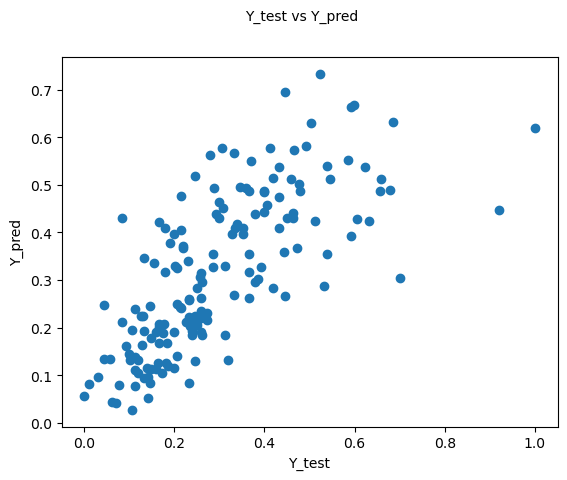

In [86]:
fig = plt.figure()
plt.scatter(Y_test, Y_pred)
fig.suptitle('Y_test vs Y_pred', fontsize = 10)              
plt.xlabel('Y_test', fontsize = 10)                          
plt.ylabel('Y_pred', fontsize = 10)
plt.show()

In [101]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [102]:
ridge_regressor = Ridge()

In [103]:
parameters = {'alpha':[4,2,0.5]}

In [105]:
ridgecv = GridSearchCV(ridge_regressor,parameters,scoring="neg_mean_absolute_error",cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [4, 2, 0.5]},
             scoring='neg_mean_absolute_error')

In [106]:
print(ridgecv.best_params_)

{'alpha': 0.5}


In [107]:
print(ridgecv.best_score_)

-0.06631424903038927


In [109]:
ridge_pred = ridgecv.predict(X_test)

Text(0, 0.5, 'ridge_pred')

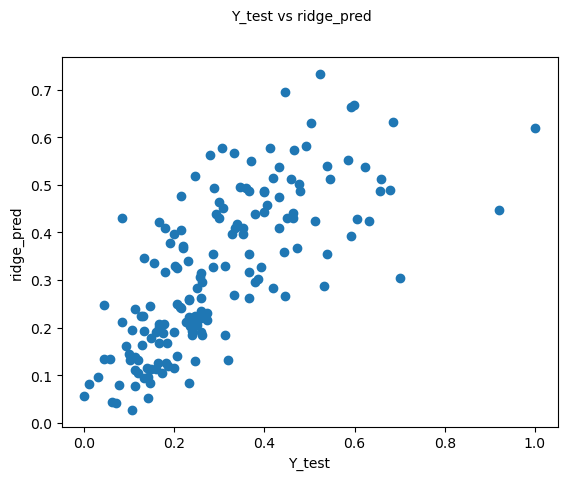

In [112]:
fig = plt.figure()
plt.scatter(Y_test, Y_pred)
fig.suptitle('Y_test vs ridge_pred', fontsize = 10)              
plt.xlabel('Y_test', fontsize = 10)                          
plt.ylabel('ridge_pred', fontsize = 10)

In [114]:
score = r2_score(Y_test, ridge_pred)
score

0.49163390193345247